In [605]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [606]:
#read loan.csv file
loan_main=pd.read_csv('loan.csv')

In [607]:
#display few records 
loan_main.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [608]:
loan_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [609]:
#calculating no.of missing values in each column
loan_main.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [610]:
#identifying the no.of columns with all missing values
loan_main.isnull().all(axis=0).sum()

54

In [611]:
#identifying the no.of rows with all missing values
loan_main.isnull().all(axis=1).sum()

0

In [612]:
#calculating percentage of missing values in each column
x=round(100*(loan_main.isnull().sum()/len(loan_main.index)),2)
print(x)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [613]:
#identifying columns with all missing (100%) values
y=x[x==100]
print(y)

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [614]:
len(y)

54

In [615]:
#drop all the columns with 100% missing values
loan_main=loan_main.drop(labels=y.index,axis=1)

In [616]:
#calculating percentage of missing values in each column
round(100*(loan_main.isnull().sum()/len(loan_main.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [617]:
#drop of columns with more than 90% missing values
loan_main=loan_main.drop(labels=['mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],axis=1)

In [618]:
#removes rows with null values 
loan_main=loan_main[~loan_main.emp_length.isnull()]
loan_main=loan_main[~loan_main.emp_title.isnull()]
loan_main=loan_main[~loan_main.revol_util.isnull()]
loan_main=loan_main[~loan_main.last_pymnt_d.isnull()]
loan_main=loan_main[~loan_main.title.isnull()]
loan_main=loan_main[~loan_main.collections_12_mths_ex_med.isnull()]
loan_main=loan_main[~loan_main.chargeoff_within_12_mths.isnull()]
loan_main=loan_main[~loan_main.pub_rec_bankruptcies.isnull()]
loan_main=loan_main[~loan_main.tax_liens.isnull()]

In [619]:
#imputing the desc missing values with 'No Description'
loan_main.desc=loan_main.desc.fillna('No Description')

In [620]:
#calculating percentage of missing values in each column after data cleaning
round(100*(loan_main.isnull().sum()/len(loan_main.index)),2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
desc                          0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec       

In [621]:
loan_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36431 entries, 1 to 39623
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  36431 no

In [622]:
#fraction of rows remaining after data cleaning
round(100*(len(loan_main.index)/39717),2)

91.73

### So 8.27% of observation lost in data cleaning

In [623]:
round(100*(loan_main.loan_status.value_counts()/36431),2)

loan_status
Fully Paid     83.51
Charged Off    13.57
Current         2.93
Name: count, dtype: float64

### Defaulted loans percentage - 13.57% 

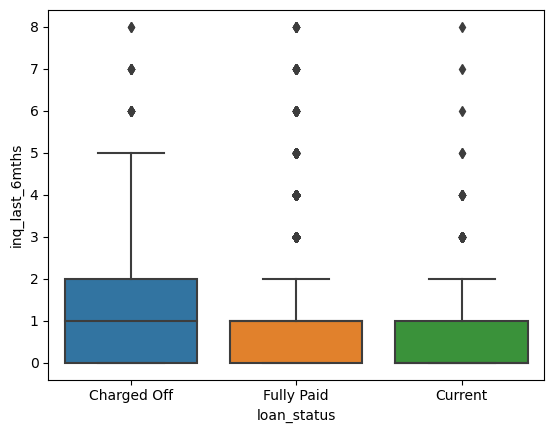

In [624]:
#more no.of inquires made in last 6months chances of default are more
sns.boxplot(x=loan_main.loan_status,y=loan_main.inq_last_6mths)
plt.show()

<Axes: xlabel='home_ownership'>

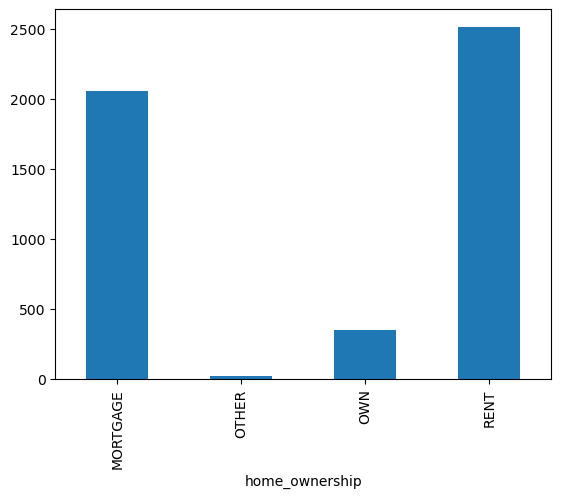

In [625]:
#rent and mortagage applicants who defaulted made more inquiries than own house applicants
abc=loan_main.groupby(['loan_status','home_ownership']).inq_last_6mths.count()
abc['Charged Off'].plot.bar()

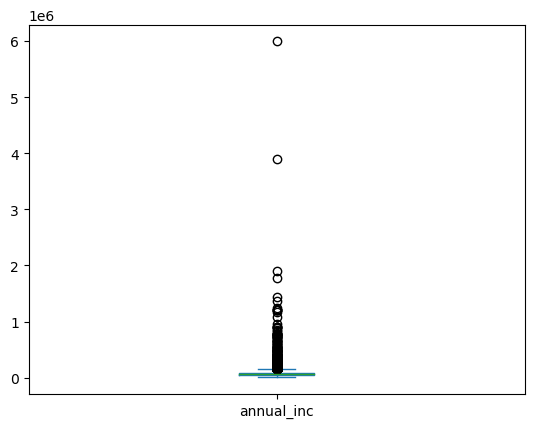

In [626]:
loan_main.annual_inc.plot.box()
plt.show()

In [627]:
#calculating 90% percentile for annual_inc
np.quantile(loan_main.annual_inc,0.90)

115000.0

In [628]:
#removing outliers from annual_inc
loan_main=loan_main[loan_main.annual_inc<115000]

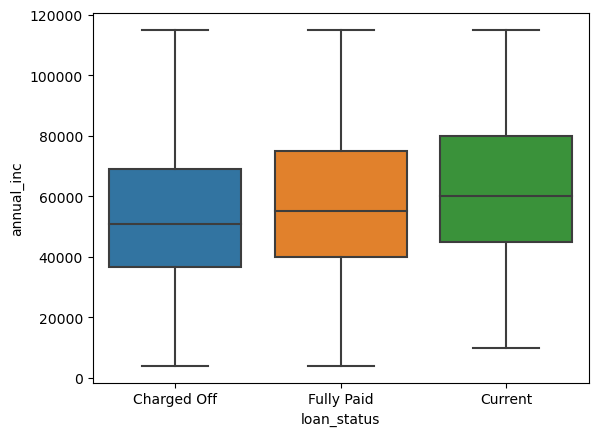

In [629]:
#more annual income less likely to default
sns.boxplot(x=loan_main.loan_status,y=loan_main.annual_inc)
plt.show()

In [630]:
# dti debt to income ratio data given in the dataset is greater than 1 always which seems inaccurate so calculated emi/inc 
# which is monthly instalment to montly income percentage 
loan_main['emi/inc']=round(100*(loan_main.installment/(loan_main.annual_inc/12)),2)

In [631]:
loan_main['emi/inc'].head()

1    2.39
3    8.28
4    1.02
5    5.22
6    4.34
Name: emi/inc, dtype: float64

In [632]:
np.quantile(loan_main['emi/inc'],0.99)

18.582900000000006

In [633]:
loan_main=loan_main[loan_main['emi/inc']<19]

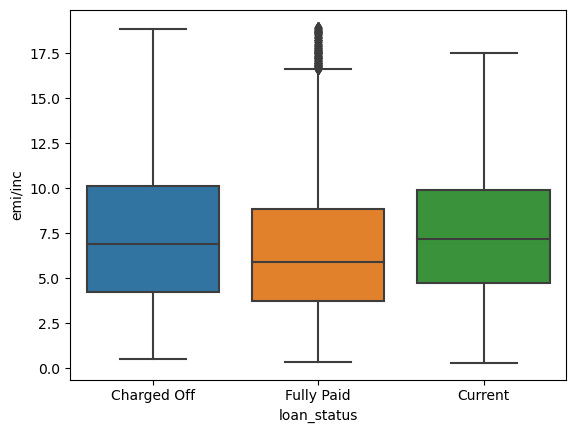

In [634]:
#more the emi per monthly income chances of deafult is high
sns.boxplot(x=loan_main.loan_status,y=loan_main['emi/inc'])
plt.show()

<Axes: ylabel='count'>

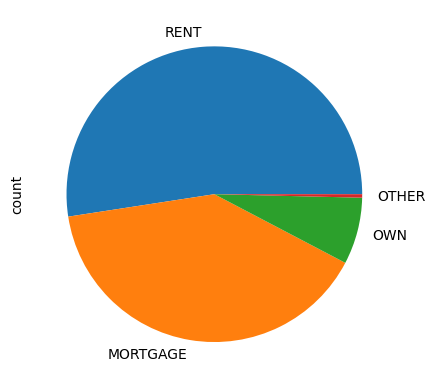

In [635]:
#applicants with home ownership as rent and mortgage are more likely to default than with own house
loan_defaults=loan_main[(loan_main.loan_status=='Charged Off')]
loan_defaults['home_ownership'].value_counts().plot.pie()

In [636]:
#applicants with home ownership as rent and mortgage are more likely to default than with own house
loan_main.groupby('loan_status').home_ownership.value_counts()


loan_status  home_ownership
Charged Off  RENT               2354
             MORTGAGE           1791
             OWN                 328
             OTHER                17
Current      MORTGAGE            494
             RENT                367
             OWN                  63
Fully Paid   RENT              13631
             MORTGAGE          11321
             OWN                1972
             OTHER                68
Name: count, dtype: int64

In [637]:
#top 10 state with high default percent
df1=loan_main
df1['state']=df1['addr_state']
df2=pd.pivot_table(data=df1,index='addr_state',columns='loan_status',values='state',aggfunc='count')
df3=df2.loc[:,['Charged Off','Fully Paid']]
df3['Total']=df3.sum(axis=1)
df3['%Charged Off'] = round(100*(df3['Charged Off']/df3['Total']),2)
df3['%Fully Paid'] = round(100*(df3['Fully Paid']/df3['Total']),2)
df4=df3.sort_values('%Charged Off',ascending=False)
df4

loan_status,Charged Off,Fully Paid,Total,%Charged Off,%Fully Paid
addr_state,,,,,
TN,2.0,7.0,9.0,22.22,77.78
NV,87.0,307.0,394.0,22.08,77.92
AK,13.0,48.0,61.0,21.31,78.69
NM,28.0,123.0,151.0,18.54,81.46
SD,10.0,45.0,55.0,18.18,81.82
HI,25.0,116.0,141.0,17.73,82.27
FL,400.0,1908.0,2308.0,17.33,82.67
GA,181.0,940.0,1121.0,16.15,83.85
NJ,228.0,1190.0,1418.0,16.08,83.92


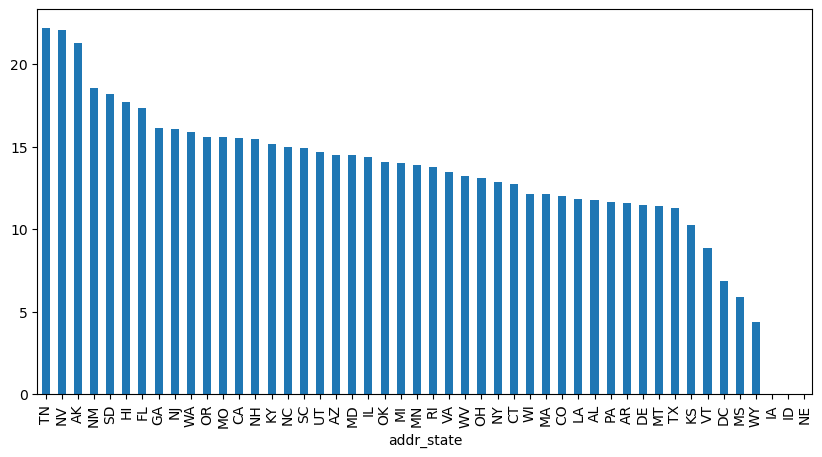

In [638]:
plt.figure(figsize=(10,5))
df4['%Charged Off'].plot.bar(stacked=True)
plt.show()

In [639]:
#average default percentage in state
df4['%Charged Off'].mean()

13.905777777777777

In [640]:
loan_main['int_rate']=loan_main.int_rate.str.rstrip('%').apply(float)
loan_main['term']=loan_main.term.str.rstrip(' months').apply(int)
loan_main['emp_length']=loan_main.emp_length.str.strip(' years').str.strip(' year').str.replace('< ','0').str.rstrip('+').apply(int)


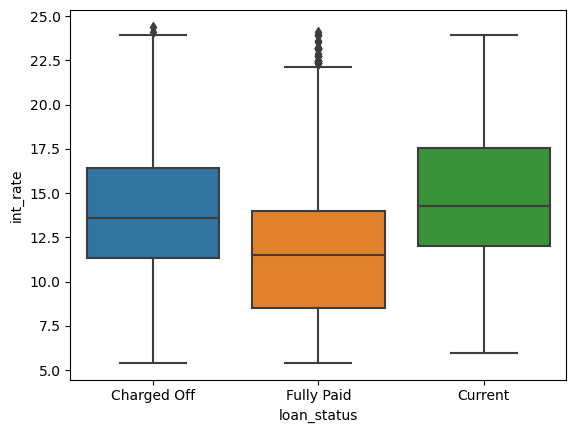

In [641]:
#chances of default high with high intereset rates
sns.boxplot(x=loan_main.loan_status,y=loan_main.int_rate)
plt.show()

In [642]:
loan_main.groupby(['loan_status','term']).int_rate.count()

loan_status  term
Charged Off  36       2480
             60       2010
Current      60        924
Fully Paid   36      21104
             60       5888
Name: int_rate, dtype: int64

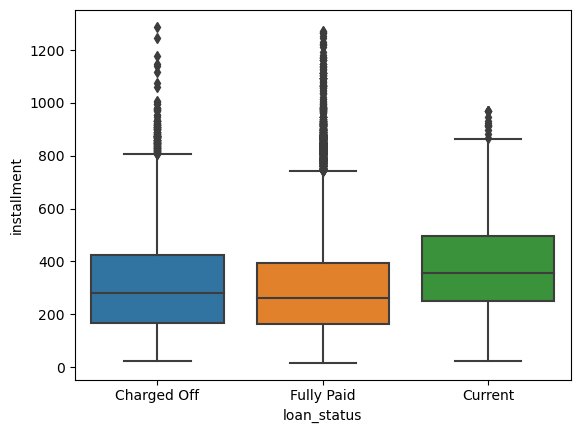

In [643]:
sns.boxplot(x=loan_main.loan_status,y=loan_main.installment)
plt.show()

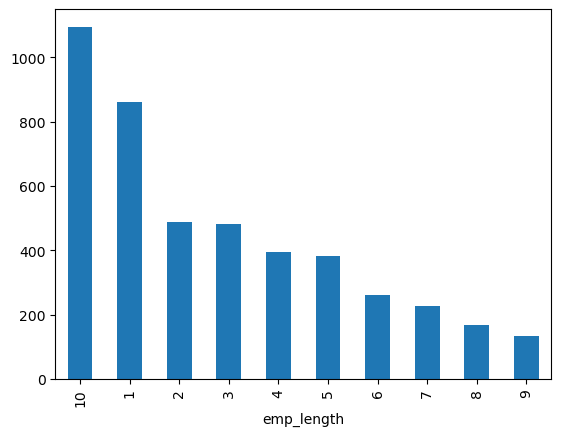

In [646]:
#employee tenure is more chance of default is less (10+ is high because that includes all the above 10 experiences)
loan_main.emp_length[loan_main.loan_status=='Charged Off'].value_counts().plot.bar()
plt.show()